# **Introduction**

*   ## **Tentang AI Comment Generator**
AI Comment Generator adalah sebuah sistem yang dirancang untuk membantu seseorang berkomentar di postingan sosial media sesuai konteks. Dengan fokus pada text generation, AI ini mampu menghasilkan komentar yang relevan dan natural menggunakan bahasa sehari-hari.

*   ## **How Does it Work?**
1. **Input Post Description**: AI menerima deskripsi atau konten dari sebuah postingan sosial media.
2. **Fine-Tuning LLM**: Sistem telah dilatih ulang (fine-tuned) menggunakan dataset khusus yang mencakup berbagai gaya komentar sosial media.
3. **Text Analysis**: LLM menganalisis konteks, nada, dan nuansa deskripsi postingan untuk memahami makna yang dimaksud.
4. **Comment Generation**: Berdasarkan analisis, AI menghasilkan beberapa komentar yang relevan, variatif, dan terlihat seperti tulisan manusia.

In [ ]:
!nvidia-smi

Thu Jun 26 14:26:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Installation**

In [ ]:
!pip install unsloth
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip uninstall triton -y
!pip install triton==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of xformers to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.8/375.8 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 7.5 

Found existing installation: unsloth 2025.6.6
Uninstalling unsloth-2025.6.6:
  Successfully uninstalled unsloth-2025.6.6
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-a7bjf6ix/unsloth_8847f2d650ae460086213f31a7dc3e1a
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-a7bjf6ix/unsloth_8847f2d650ae460086213f31a7dc3e1a
  Resolved https://github.com/unslothai/unsloth.git to commit 425ae4d076ed86c5ccd1bae1bdc615bde5cda6a8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2025.6.6-py3-none-any.whl size=280660 sha256=72c6d267851c83252ff1872b7fd52e723b05edca96aa05215969a60bd2ee2324
  Stored in directory: /tmp/pip-ephem-wheel-cache-bhdphfnq/wheels/d1/17/05/850ab10c33284a4763b0595cd8ea9d01fce6e221cac24b3c01
Successfully built unsloth
Found existing installation: triton 3.3.0
Uninst

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 1024
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-3B-bnb-4bit",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.6.6: Fast Llama patching. Transformers: 4.52.4.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 2.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

In [ ]:
model.config

LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128001,
  "head_dim": 128,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 24,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pad_token_id": 128004,
  "pretraining_tp": 1,
  "quantization_config": {
    "bnb_4bit_compute_dtype": "float16",
    "bnb_4bit_quant_type": "nf4",
    "bnb_4bit_use_double_quant": true,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,
    "quant_method": "bitsandbytes"
  },
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_f

In [ ]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 3072, padding_idx=128004)
    (layers): ModuleList(
      (0-27): 28 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=3072, out_features=3072, bias=False)
          (k_proj): Linear4bit(in_features=3072, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=3072, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=3072, out_features=3072, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=3072, out_features=8192, bias=False)
          (up_proj): Linear4bit(in_features=3072, out_features=8192, bias=False)
          (down_proj): Linear4bit(in_features=8192, out_features=3072, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm

# Load model for PEFT

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],

    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",

    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

Unsloth 2025.6.6 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


# **Data Prep**

## **Load CSV**

In [ ]:
from datasets import load_dataset
from google.colab import drive

drive.mount('/content/drive')

dataset = load_dataset('csv', data_files='/content/drive/MyDrive/Dataset/dataset_posts.csv', sep=';')
dataset["train"][0]

Mounted at /content/drive


Generating train split: 0 examples [00:00, ? examples/s]

{'input': 'Peeling for sensitive skin? Let’ find out!🎊Kamu bisa aplikasikan Sensitive Moisture Gel yang kamu miliki dengan produk eksfoliasi lho, Skintizen. Salah satunya adalah menggunakan Peeling Solution. Yuk simak step by step ini agar tidak keliru!🍒Kasih tahu di kolom komentar dong kombinasi moist dan produk eksfoliasi SKINTIFIC andalanmu!🤹🏻\u200d♀️',
 'output': 'Wahh keren cocok bngt inii😍'}

In [ ]:
data_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
You are an AI assistant specialized in generating engaging and natural comments for social media posts.
Your task is to generate several diverse and relevant comments in Indonesian, suitable for a social media post, based on the provided post description.
Ensure the comments sound natural and human-like, as if written by a regular social media user.

### Input:
{}

### Response:
{}
"""

EOS_TOKEN = tokenizer.eos_token

def formatting_prompts_func(examples):
    inputs = examples["input"]
    outputs = examples["output"]
    texts = []
    for input, output in zip(inputs, outputs):
        text = data_prompt.format(input, output) + EOS_TOKEN
        texts.append(text)
    return {"text": texts}

dataset = dataset.map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/3385 [00:00<?, ? examples/s]

## Split dataset

In [ ]:
# membagi dataset menjadi 3, yaitu train, eval, daan test
dataset_dict = dataset["train"].train_test_split(test_size=0.2)
eval_test_split = dataset_dict["test"].train_test_split(test_size=0.5)

dataset_dict["eval"] = eval_test_split["train"]
dataset_dict["test"] = eval_test_split["test"]

dataset_dict

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'text'],
        num_rows: 2708
    })
    test: Dataset({
        features: ['input', 'output', 'text'],
        num_rows: 339
    })
    eval: Dataset({
        features: ['input', 'output', 'text'],
        num_rows: 338
    })
})

In [ ]:
import matplotlib.pyplot as plt

train_token_counts = []

for example in dataset_dict["train"]:
    train_token_counts.append(
        len(
            tokenizer(
                example["text"],
                add_special_tokens=True,
                return_attention_mask=False,
            )["input_ids"]
        )
    )

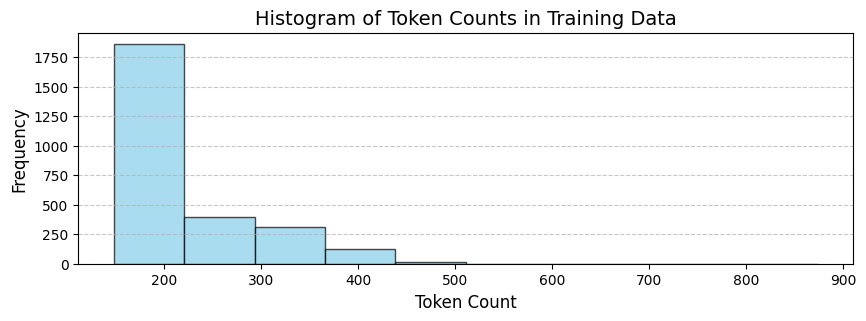

In [ ]:
plt.figure(figsize=(10, 3))
plt.hist(train_token_counts, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Token Counts in Training Data', fontsize=14)
plt.xlabel('Token Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Train the model**

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset_dict["train"],
    eval_dataset = dataset_dict["eval"],
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = True,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        per_device_eval_batch_size= 2,
        gradient_accumulation_steps = 4,
        eval_strategy = "steps",
        warmup_ratio = 0.1,
        num_train_epochs = 3,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 25,
        logging_strategy = 'steps',
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to="none"
    ),
)

Unsloth: Tokenizing ["text"]:   0%|          | 0/2708 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"]:   0%|          | 0/338 [00:00<?, ? examples/s]

In [ ]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
3.441 GB of memory reserved.


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,708 | Num Epochs = 3 | Total steps = 1,017
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 24,313,856/3,000,000,000 (0.81% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss,Validation Loss
25,2.907200,2.324307
50,1.598600,1.061329
75,0.730200,0.461021
100,0.385800,0.291640
125,0.263200,0.260748
150,0.264200,0.247422
175,0.235800,0.242617
200,0.249700,0.241573
225,0.247300,0.237719
250,0.263100,0.234633


Unsloth: Not an error, but LlamaForCausalLM does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


Step,Training Loss,Validation Loss
25,2.907200,2.324307
50,1.598600,1.061329
75,0.730200,0.461021
100,0.385800,0.291640
125,0.263200,0.260748
150,0.264200,0.247422
175,0.235800,0.242617
200,0.249700,0.241573
225,0.247300,0.237719
250,0.263100,0.234633


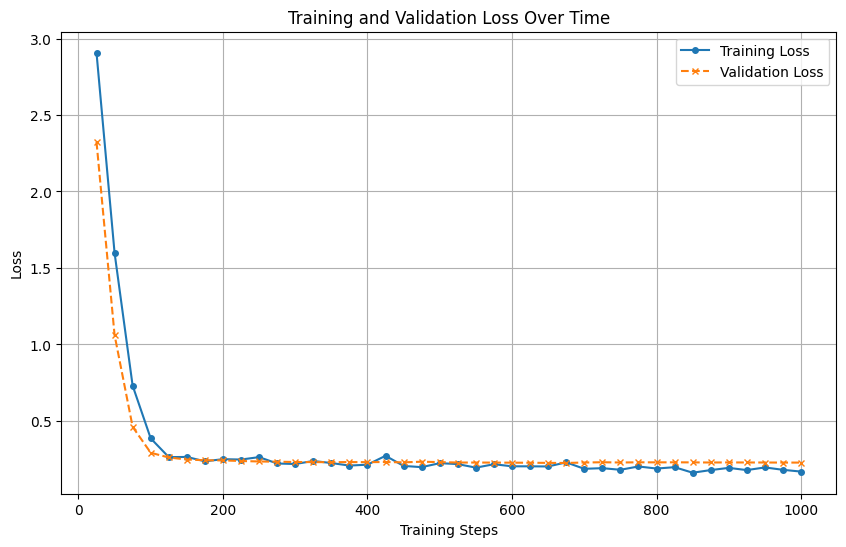

In [ ]:
import matplotlib.pyplot as plt

train_loss = {}
eval_loss = {}

for log in trainer.state.log_history:
    if 'step' in log:
        current_step = log['step']
        if 'loss' in log:
            train_loss[current_step] = log['loss']
        if 'eval_loss' in log:
            eval_loss[current_step] = log['eval_loss']

all_steps = sorted(list(set(list(train_loss.keys()) + list(eval_loss.keys()))))

plot_training_loss = [train_loss.get(step, float('nan')) for step in all_steps]
plot_validation_loss = [eval_loss.get(step, float('nan')) for step in all_steps]

plt.figure(figsize=(10, 6))
plt.plot(all_steps, plot_training_loss, label='Training Loss', marker='o', linestyle='-', markersize=4)
plt.plot(all_steps, plot_validation_loss, label='Validation Loss', marker='x', linestyle='--', markersize=4)
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

6546.3521 seconds used for training.
109.11 minutes used for training.
Peak reserved memory = 4.58 GB.
Peak reserved memory for training = 1.139 GB.
Peak reserved memory % of max memory = 31.07 %.
Peak reserved memory for training % of max memory = 7.727 %.


## **Inference**

In [ ]:
FastLanguageModel.for_inference(model)
inputs = tokenizer(
[
    data_prompt.format(
        "Ternyata Glass Glow Tinted Lip Balm bisa 3-in-1 use lho, Sahabat Scarlett!💞Look at how pretty it is💖 Bisa kamu aplikasikan sebagai eyeshadow, lips, dan blush😘 with Glossy Glow effect finish look❤️ Create your own 3-in-1 NOW!💋", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=64, # Atur berapa banyak token baru yang ingin dihasilkan
    use_cache=True,
    pad_token_id=tokenizer.eos_token_id
)

tokenizer.batch_decode(outputs)

['<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nYou are an AI assistant specialized in generating engaging and natural comments for social media posts.\nYour task is to generate several diverse and relevant comments in Indonesian, suitable for a social media post, based on the provided post description.\nEnsure the comments sound natural and human-like, as if written by a regular social media user.\n\n### Input:\nTernyata Glass Glow Tinted Lip Balm bisa 3-in-1 use lho, Sahabat Scarlett!💞Look at how pretty it is💖 Bisa kamu aplikasikan sebagai eyeshadow, lips, dan blush😘 with Glossy Glow effect finish look❤️ Create your own 3-in-1 NOW!💋\n\n### Response:\nWahhh😍😍😍<|end_of_text|>']

### TextStreamer

In [ ]:
FastLanguageModel.for_inference(model)
inputs = tokenizer(
[
    data_prompt.format(
        "Ternyata Glass Glow Tinted Lip Balm bisa 3-in-1 use lho, Sahabat Scarlett!💞Look at how pretty it is💖 Bisa kamu aplikasikan sebagai eyeshadow, lips, dan blush😘 with Glossy Glow effect finish look❤️ Create your own 3-in-1 NOW!💋", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(
    input_ids = inputs.input_ids,
    attention_mask = inputs.attention_mask,
    streamer = text_streamer,
    max_new_tokens = 64,
    pad_token_id = tokenizer.eos_token_id
)

Wahh, mau nyobain yang ini 😍<|end_of_text|>


# **Saving, loading finetuned models**

## **Logging to Huggingface**

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
model.save_pretrained("ai_comment") # Local saving
tokenizer.save_pretrained("ai_comment")
model.push_to_hub("aismaanly/ai_comment") # Online saving
tokenizer.push_to_hub("aismaanly/ai_comment")

README.md:   0%|          | 0.00/580 [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/97.3M [00:00<?, ?B/s]

Saved model to https://huggingface.co/aismaanly/ai_comment


  0%|          | 0/1 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]